In [1]:
import numpy as np  
import struct  
import matplotlib.pyplot as plt  
import operator
from numpy.linalg import eig

# Read the image data
filename = 't10k-images-idx3-ubyte'  
binfile = open(filename , 'rb')  
buf = binfile.read()  
index = 0  
magic, numImages , numRows , numColumns = struct.unpack_from('>IIII' , buf , index)  
index += struct.calcsize('>IIII')  

# Read the labels
filename1 =  't10k-labels-idx1-ubyte'  
binfile1 = open(filename1 , 'rb')  
buf1 = binfile1.read()  
  
index1 = 0  
magic1, numLabels1 = struct.unpack_from('>II' , buf , index)  
index1 += struct.calcsize('>II')  

# Initialization
DataNumbers = 10000
datamat = np.zeros((DataNumbers,28*28))
datalabel = []

# Collect data
for i in range(DataNumbers):
    im = struct.unpack_from('>784B' ,buf, index)  
    index += struct.calcsize('>784B')  
    im = np.array(im) 
    datamat[i]=im
    numtemp = struct.unpack_from('1B' ,buf1, index1) 
    label = numtemp[0]
    index1 += struct.calcsize('1B')
    datalabel.append(label)

### Start your PCA ###
# print(datamat[0].shape)
# print(datalabel)

# TASK1: print the mean image for 1-----------------------------------------------------------------------
picture_with_one = []

for i in range(0, DataNumbers):
    if datalabel[i] == 1:
        picture_with_one.append(datamat[i])

picture_with_one = np.array(picture_with_one)
# print(picture_with_one.shape)

# calculate mean
mean_one = np.mean(picture_with_one, axis = 0).reshape(1,-1)

# print the mean picture for one
mean_one = mean_one.reshape(28,28)
plt.imshow(mean_one, cmap = 'gray')
plt.imsave("p1-3.png", arr = mean_one,dpi = 480, cmap = 'gray')
# plt.plot(mean_one)
# plt.show()
# END TASK 1 --------------------------------------------------------------------------------------------

# TASK 2: Global PCA
# here we transpose the matrix so that all the vectors will become column vector
mean_pictures = np.mean(datamat, axis = 0).reshape(1,-1)
centered_pictures = datamat.T - mean_pictures.T

# # VERSION 1: with out Gram Matrix Trick------------------------------------------------------------------
# # calculate the covarience matrix
# sigma = np.cov(centered_pictures)
# # print(sigma)
# # eigen dicomposition of sigma
# e_values, e_vectors = eig(sigma)

# # print(e_values.shape)

# # find the index of five largest e_values
# e_index = []
# for i in range(0, 5):
#     cp_e_values = e_values
#     e_index.append(cp_e_values.argmax())
#     cp_e_values[cp_e_values.argmax()] = cp_e_values.min()

# e_vectors_top5 = []
# for j in e_index:
#     e_vectors_top5.append(np.abs(e_vectors[j]))


# VERSION 2: Use Gram Matrix trick--------------------------------------------------------------------
ee_values, ee_vectors = eig(centered_pictures.T@centered_pictures)

# find the index of n largest eigen values
ee_index = []
num_vectors = 5 # change this value
for i in range(0,num_vectors):
    cp_ee_values = ee_values
    ee_index.append(cp_ee_values.argmax())
    cp_ee_values[cp_ee_values.argmax()] = cp_ee_values.min()

# print(ee_index)

# get v'
ee_vectors_top = []
for j in ee_index:
    ee_vectors_top.append(ee_vectors[j])

# calculate v from v' and X
e_vectors_top = []
for topee_vector in ee_vectors_top:
    direction = centered_pictures@topee_vector.reshape(-1,1)
    e_vector = direction/np.sqrt(direction.T@direction)
    e_vectors_top.append(e_vector)

# -----------------------------------------------------------------------------------------------------

# # plot the top n vectors
# for i,vector in enumerate(e_vectors_top):
#     vector = vector.reshape(28,28)
#     plt.imshow(vector,cmap = 'gray')
#     plt.imsave("p1-vector-%d.png"%i, arr = vector, dpi = 480, cmap = "gray")


# # Question 3-----------------------------------------------------------------------------------------
# # randomly pick one picture with its label
# random_index = np.random.randint(0,10000)
# picture = datamat[random_index]
# label = datalabel[random_index]
# # print(picture,label)

# # find the index of n largest eigen values
# ee_index = []
# num_vectors = 200 # change the number here
# for i in range(0,num_vectors):
#     cp_ee_values = ee_values
#     ee_index.append(cp_ee_values.argmax())
#     cp_ee_values[cp_ee_values.argmax()] = cp_ee_values.min()

# # get v'
# ee_vectors_top = []
# for j in ee_index:
#     ee_vectors_top.append(ee_vectors[j])

# # calculate v from v' and X
# e_vectors_top = []
# for topee_vector in ee_vectors_top:
#     direction = centered_one@topee_vector.reshape(-1,1)
#     e_vector = direction/np.sqrt(direction.T@direction)
#     e_vectors_top.append(np.abs(e_vector))

# e_vectors_top = np.array(e_vectors_top)
# e_matrix = e_vectors_top[0]
# for i in range(1, num_vectors):
#     e_matrix = np.concatenate((e_matrix, e_vectors_top[i]), axis = 1)

# # center the picture
# # first calculate the mean for this class
# picture_this_class = []

# for i in range(0, DataNumbers):
#     if datalabel[i] == label:
#         picture_this_class.append(datamat[i])

# picture_this_class = np.array(picture_this_class)
# # print(picture_this_class.shape)

# # calculate mean
# mean_this_class = np.mean(picture_this_class, axis = 0).reshape(1,-1)
# picture = np.array(picture).reshape(1,-1)

# centered_picture = picture.T - mean_this_class.T

# # project to eigen space

# # print("e_matrix shape is:", e_matrix.shape)

# projection = e_matrix.T@centered_picture

# # reconstruction using top vectors
# reconstruction = e_matrix@projection

# output = reconstruction.reshape(28,28)
# plt.imshow(output, cmap = 'gray')
# plt.imsave("p1-4-%dvectors.png"%num_vectors, arr = output,dpi = 480, cmap = 'gray')

In [79]:
random_index = np.random.randint(0,10000)
picture = datamat[random_index]
label = datalabel[random_index]

In [100]:
# find the index of n largest eigen values
ee_index = []
num_vectors = 20 # change this value
for i in range(0,num_vectors):
    cp_ee_values = ee_values
    ee_index.append(cp_ee_values.argmax())
    cp_ee_values[cp_ee_values.argmax()] = cp_ee_values.min()

# print(ee_index)

# get v'
ee_vectors_top = []
for j in ee_index:
    ee_vectors_top.append(ee_vectors[j])

# calculate v from v' and X
e_vectors_top = []
for topee_vector in ee_vectors_top:
    direction = centered_pictures@topee_vector.reshape(-1,1)
    e_vector = direction/np.sqrt(direction.T@direction)
    e_vectors_top.append(e_vector)

(784, 20)
(20, 1)
(1, 784)
126191548.50905684


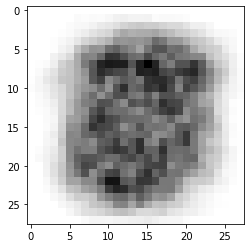

In [101]:
# Question 3-----------------------------------------------------------------------------------------
# randomly pick one picture with its label
# print(picture,label)

e_matrix = e_vectors_top[0].reshape(-1,1)
for i in range(1, num_vectors):
    e_matrix = np.concatenate((e_matrix, e_vectors_top[i].reshape(-1,1)), axis = 1)
# center this picture

picture = np.array(picture).reshape(1,-1)
centered_picture = picture.T - mean_pictures.T

# project to eigen space

# print("e_matrix shape is:", e_matrix.shape)

projection = e_matrix.T@centered_picture


# reconstruction using top vectors
print(e_matrix.shape)
print(projection.shape)
print(mean_pictures.shape)
reconstruction = e_matrix@projection + mean_pictures.reshape(-1,1)


output = reconstruction.reshape(28,28)
plt.imshow(output, cmap = 'gray')
plt.imsave("p1-4-%dvectors.png"%num_vectors, arr = output,dpi = 480, cmap = 'gray')

# calculate mse
mse = np.sum((reconstruction.reshape(1,-1) - np.array(picture).reshape(1,-1))**2)
print(mse)

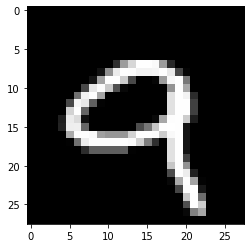

In [80]:
# print original picture
output = picture.reshape(28,28)
plt.imshow(output, cmap = 'gray')
plt.imsave("p1-4-origin.png", arr = output,dpi = 480, cmap = 'gray')

In [81]:
print(label)

9
